### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
loan_themes = pd.read_csv("../../data/kiva/loan_themes_by_region.csv")
loan_themes.head(3)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


### Checking for missing values

In [3]:
missing_cols = [col for col in loan_themes.columns if any(loan_themes[col].isnull())]

pd.DataFrame({
    "Total": len(loan_themes),
    "Missing": loan_themes[missing_cols].isnull().sum()
})

,Missing,Total
geocode_old,14536,15736
ISO,14,15736
geocode,2074,15736
names,2075,15736
lat,2074,15736
lon,2074,15736
mpi_region,14,15736
mpi_geo,6065,15736
rural_pct,1392,15736


### Distribution of rural_pct

It would be cool if I could overlay a higher resoulution graph over this.  I think there are interesting details that aren't show (spike in 0 rural_pct values).

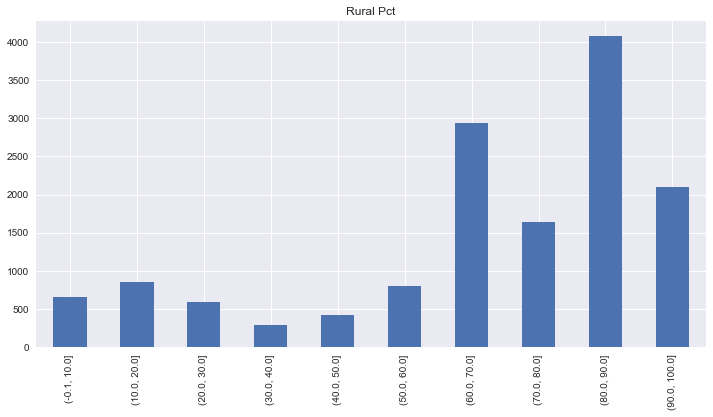

In [19]:
sns.set(rc={'figure.figsize':(12, 6)})
plt.title("Rural Pct")
_ = pd.cut(loan_themes.rural_pct, 10).value_counts().sort_index().plot(kind="bar")

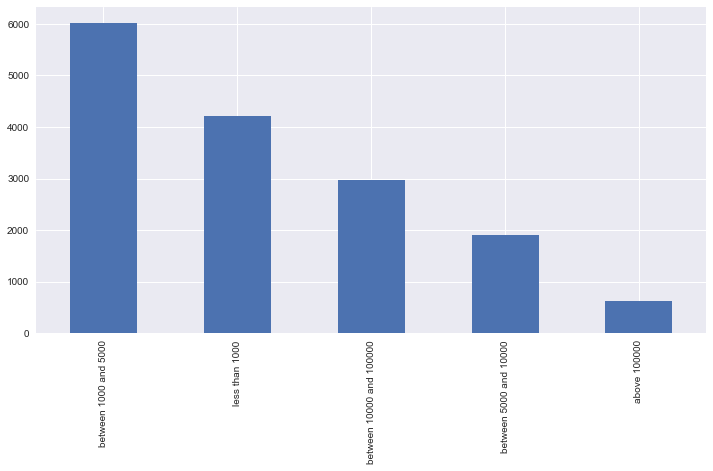

In [24]:
def bucket_it(x):
    if x > 100000:
        return "above 100000"
    elif x > 10000:
        return "between 10000 and 100000"
    elif x > 5000:
        return "between 5000 and 10000"
    elif x > 1000:
        return "between 1000 and 5000"
    return "less than 1000"

_ = loan_themes.amount.map(bucket_it).value_counts().plot(kind="bar")
# loan_themes.amount.map(bucket_it)

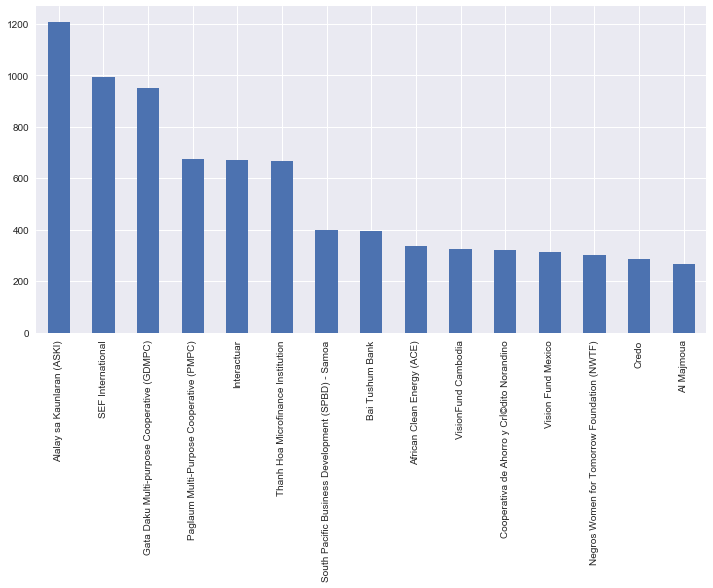

In [7]:
_ = loan_themes['Field Partner Name'].value_counts().head(15).plot(kind="bar")

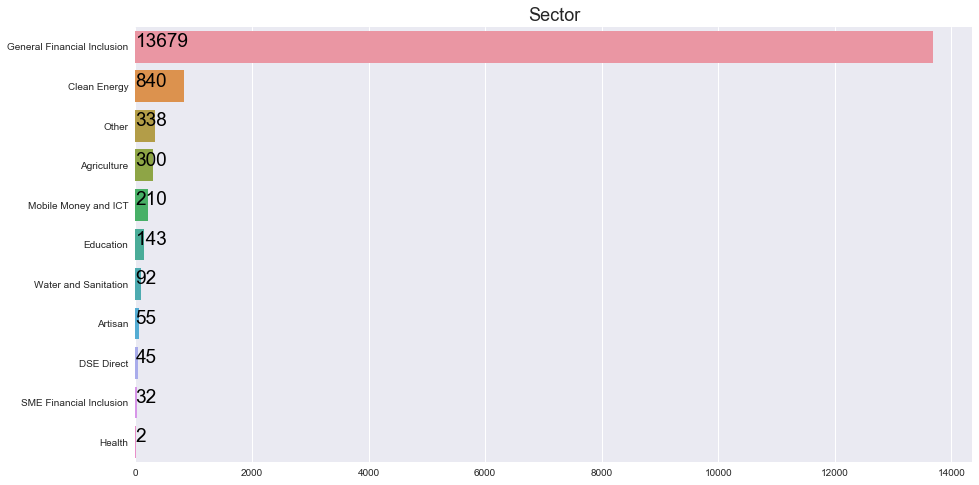

In [8]:
plt.figure(figsize=(15,8))
data = loan_themes['sector'].value_counts()
sns.barplot(data.values, data.index)

for i, v in enumerate(data.values):
    plt.text(0.8, i, v, color='k', fontsize=19)
plt.title("Sector", fontsize=18)
plt.show()

### Pie chart of the forkiva column

How do I get text in the pie chart?  It would be nice if I could see the number for each

What does forkiva mean anyways?

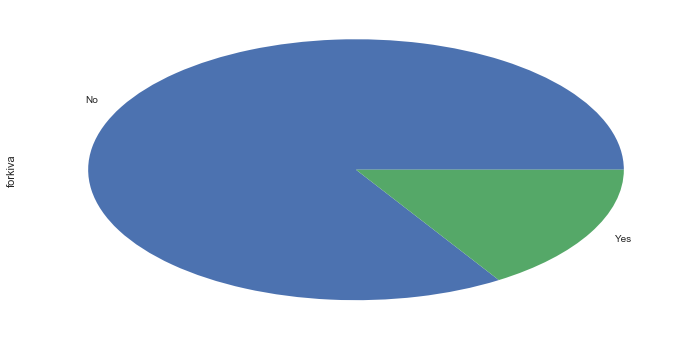

In [9]:
_ = loan_themes.forkiva.value_counts().plot(kind="pie")

### Regions

Look at the different regions

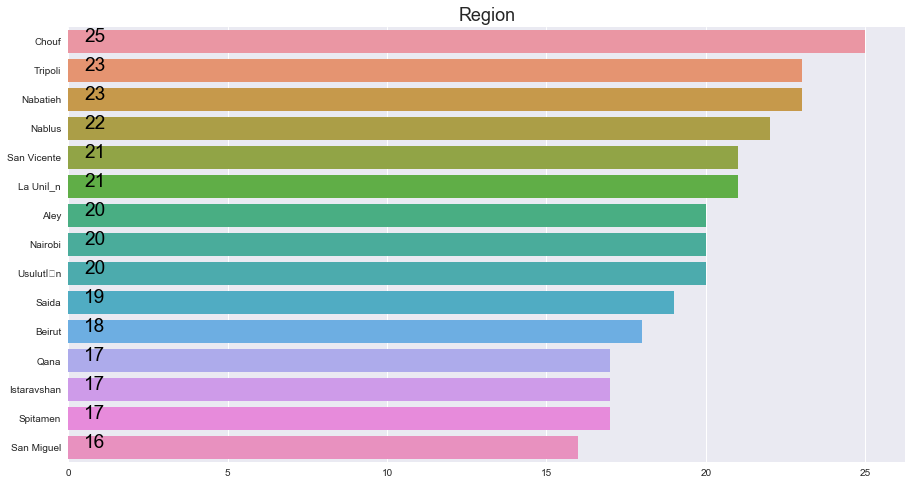

In [11]:
plt.figure(figsize=(15,8))
data = loan_themes['region'].value_counts().head(15)
sns.barplot(data.values, data.index)

for i, v in enumerate(data.values):
    plt.text(0.5, i, v, color='k', fontsize=19)
plt.title("Region", fontsize=18)
plt.show()